> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

This dataset collects information from 100,000+ medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics 

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

Questions:
1. Did patients who didn't show up receive an sms
2. What is the age distribution of patients who showed vs those who didn't
3. Which neighbourhoods are known for patients not showing up
4. The distribution of the appointment day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.shape

(110527, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.rename(columns={
    'Hipertension':'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'No_show'
},inplace=True)

In [5]:
sum(df.duplicated())

0

In [6]:
df.drop(['AppointmentID','PatientId'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hypertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handicap        110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No_show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


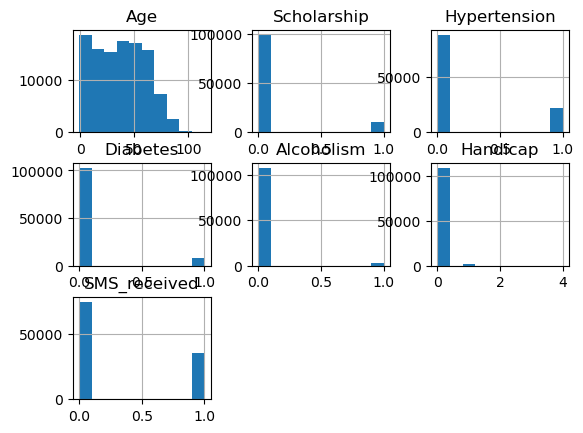

In [8]:
df.hist();

In [9]:
missed = df['No_show'] == 'Yes'
showed_up = df['No_show'] == 'No'

In [10]:
df[missed].groupby('SMS_received').count()['No_show']

SMS_received
0    12535
1     9784
Name: No_show, dtype: int64

In [11]:
df[showed_up].groupby('SMS_received').count()['No_show']

SMS_received
0    62510
1    25698
Name: No_show, dtype: int64

In [12]:
df[missed].shape

(22319, 12)

In [13]:
df[showed_up].shape

(88208, 12)

In [14]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
df.drop(df[df['Age']==-1].index,inplace=True)

In [16]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x[:10])
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x[:10])

In [17]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [18]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df['days_passed'] = df['AppointmentDay'] -df['ScheduledDay']
df['days_passed'] = df['days_passed'].dt.days

In [20]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,days_passed
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


/tmp/ipykernel_73521/52891857.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[missed].days_passed.value_counts().plot.bar()


<AxesSubplot:>

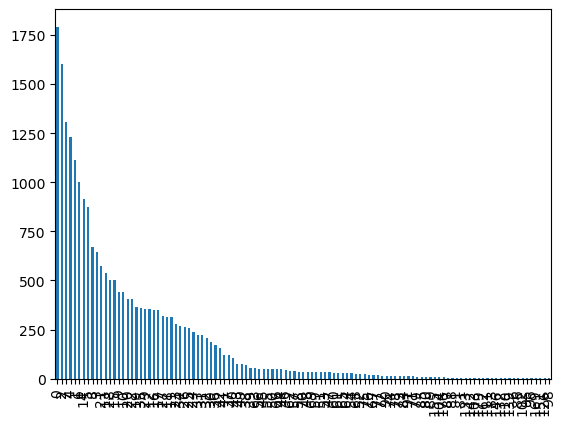

In [31]:
df[missed].days_passed.value_counts().plot.bar()

/tmp/ipykernel_73521/2722804615.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[showed_up].days_passed.value_counts().plot.bar()


<AxesSubplot:>

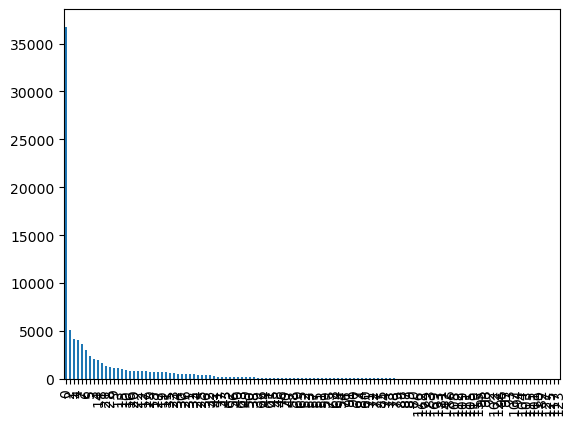

In [32]:
df[showed_up].days_passed.value_counts().plot.bar()

In [52]:
missed_sms = df[missed]['SMS_received'].value_counts()
showed_sms = df[showed_up]['SMS_received'].value_counts()

/tmp/ipykernel_73521/1866160016.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missed_sms = df[missed]['SMS_received'].value_counts()
/tmp/ipykernel_73521/1866160016.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  showed_sms = df[showed_up]['SMS_received'].value_counts()


In [53]:
no_msg = df.query('SMS_received == 0')
yes_msg = df.query('SMS_received > 0')

In [209]:
df.groupby(['Gender', 'No_show']).count()['Age']

No_show
No     57245
Yes    14594
Name: Age, dtype: int64

In [210]:
# Gets the count, total and proportion
appoint_counts = df.groupby(['Gender', 'No_show']).count()['Age']
appoint_total = df.groupby('Gender').count()['Age']
showed_prop = appoint_counts['M'] / appoint_total['M']
missed_prop = appoint_counts['F'] / appoint_total['F']
showed_prop, missed_prop

(No_show
 No     0.800321
 Yes    0.199679
 Name: Age, dtype: float64,
 No_show
 No     0.796851
 Yes    0.203149
 Name: Age, dtype: float64)

In [128]:
appoint_counts, appoint_total

(No_show  SMS_received
 No       0               62509
          1               25698
 Yes      0               12535
          1                9784
 Name: Gender, dtype: int64,
 SMS_received
 0    75044
 1    35482
 Name: Gender, dtype: int64)

In [212]:
ind = np.arange(len(missed_prop))  # the x locations for the groups
width = 0.35       # the width of the bars

In [213]:
ind+width

array([0.35, 1.35])

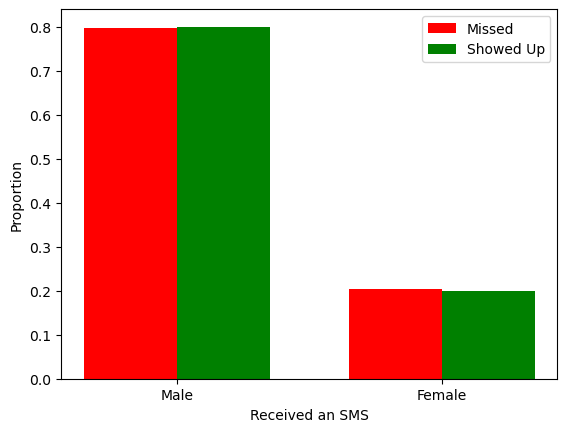

In [215]:
# plot bars
red_bars = plt.bar(ind, missed_prop, width, color='r', label='Missed')
white_bars = plt.bar(ind + width, showed_prop, width, color='g', label='Showed Up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Received an SMS')
#plt.title('Proportion of those who')
locations = ind + width / 2  # xtick locations
labels = ['Male',"Female"]  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

In [157]:
missed = df[df['No_show']=='Yes']
showed = df[df['No_show']=='No']

In [144]:
handicap_count = df.groupby(['No_show','Handicap']).count()['Gender']
handicap_total = df.groupby('No_s').count()['Gender']
nohandicap_prop = handicap_count[0] / handicap_total[0]
onehandicap_prop = handicap_count[1] / handicap_total[1]
twohandicap_prop = handicap_count[2] / handicap_total[2]
threehandicap_prop = handicap_count[3] / handicap_total[3]
fourhandicap_prop =  handicap_count[4] / handicap_total[4]
showed_prop = handicap_count['No'] / handicap_total['No']
missed_prop = handicap_count['Yes'] / handicap_total['Yes']
showed_prop, missed_prop

In [180]:
handicap_total = df.groupby('Handicap').count()['Gender']
missed_handicap_count = missed.groupby('Handicap').count()['Gender']
showed_handicap_count = showed.groupby('Handicap').count()['Gender']
missed_handicap_prop = missed_handicap_count / handicap_total
showed_handicap_prop = showed_handicap_count / handicap_total
missed_handicap_prop, showed_handicap_prop

(Handicap
 0    0.202355
 1    0.179236
 2    0.202186
 3    0.230769
 4    0.333333
 Name: Gender, dtype: float64,
 Handicap
 0    0.797645
 1    0.820764
 2    0.797814
 3    0.769231
 4    0.666667
 Name: Gender, dtype: float64)

In [175]:
handicap_count / handicap_total

Handicap
0    0.202355
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: Gender, dtype: float64

In [ ]:
plt.bar()

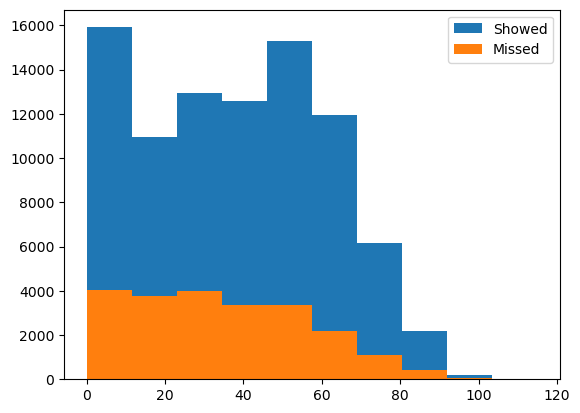

In [200]:
plt.hist(showed['Age'],label='Showed')
plt.hist(missed['Age'],label='Missed')
plt.legend();

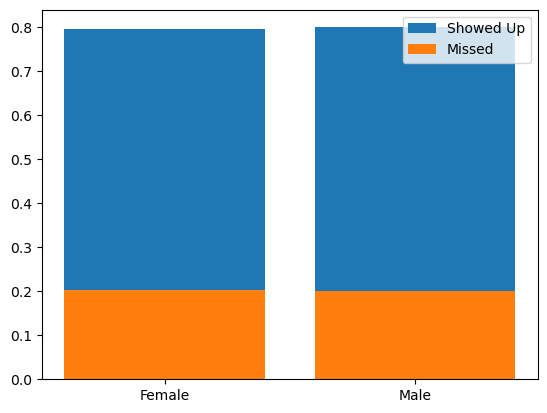

In [220]:
gender_total = df.groupby('Gender').count()['Age']
missed_gender_count = missed.groupby('Gender').count()['Age']
showed_gender_count = showed.groupby('Gender').count()['Age']
missed_gender_prop = missed_gender_count / gender_total
showed_gender_prop = showed_gender_count / gender_total
missed_gender_prop, showed_gender_prop
plt.bar(['Female','Male'],showed_gender_prop,label='Showed Up')
plt.bar(['Female','Male'],missed_gender_prop,label="Missed")
plt.legend();

In [222]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show', 'days_passed'],
      dtype='object')

<AxesSubplot:xlabel='Hypertension,Diabetes,Alcoholism'>

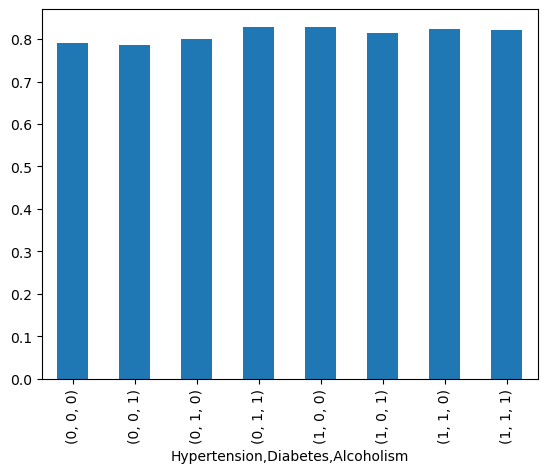

In [231]:
comb = showed.groupby(['Hypertension','Diabetes','Alcoholism']).count()['Gender'] / df.groupby(['Hypertension','Diabetes','Alcoholism']).count()['Gender']
comb.plot.bar()

In [232]:
hyper_prop = showed.groupby('Hypertension').count()['Gender'] / df.groupby('Hypertension').count()['Gender']
diab_prop = showed.groupby('Diabetes').count()['Gender'] / df.groupby('Diabetes').count()['Gender']
alco_prop = showed.groupby('Alcoholism').count()['Gender'] / df.groupby('Alcoholism').count()['Gender']

In [297]:
hyper_prop = df.query('Hypertension == 1').groupby('No_show').count()['Gender'] / df.query('Hypertension == 1').shape[0]
diab_prop = df.query('Diabetes == 1').groupby('No_show').count()['Gender'] / df.query('Diabetes == 1').shape[0]
alco_prop = df.query('Alcoholism == 1').groupby('No_show').count()['Gender'] / df.query('Alcoholism == 1').shape[0]

In [278]:
hyper_prop

Hypertension
0    0.790961
1    0.826980
Name: Gender, dtype: float64

In [294]:
df.query('Hypertension == 1').shape[0]

21801

In [299]:
alco_prop

No_show
No     0.798512
Yes    0.201488
Name: Gender, dtype: float64

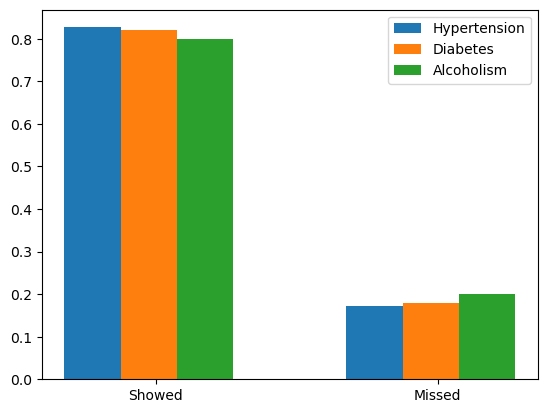

In [301]:
plt.bar(ticks-0.2,hyper_prop,align='center',width=0.2,label='Hypertension')
plt.bar(ticks,diab_prop,width=0.2,label='Diabetes')
plt.bar(ticks+0.2,alco_prop,width=0.2,label='Alcoholism')
locations = ticks  + 0.05 / 2  # xtick locations
labels = ['Showed',"Missed"]  # xtick labels
plt.xticks(locations, labels)
plt.legend();

<AxesSubplot:>

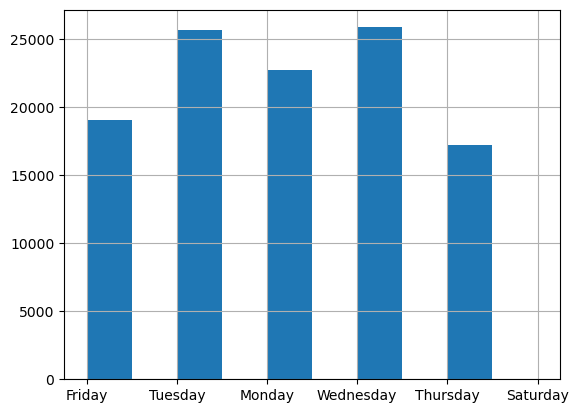

In [309]:
df.AppointmentDay.dt.day_name().hist()

In [316]:
df['days_passed'].mean()

10.183793858458642

<BarContainer object of 2 artists>

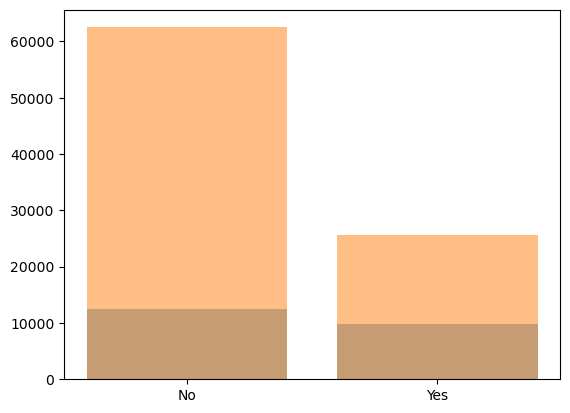

In [69]:
plt.bar(['No','Yes'],missed_sms, alpha=0.5)
plt.bar(['No','Yes'],showed_sms,alpha=0.5)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])